In [82]:
import pandas as pd
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid")

In [79]:
df = pd.read_csv('evaluation.csv')
df.head()

,Creator,Talk number,Overall Talk Quality,Powerpoint Quality
0,H,1,4,4
1,G,2,4,5
2,H,3,3,3
3,G,4,5,4
4,H,5,4,4


(0.9, 5.2)

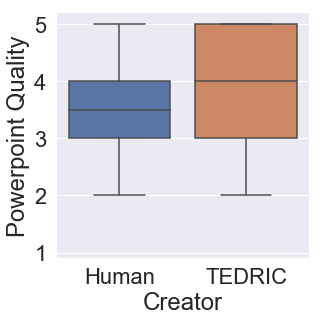

In [80]:
df = df.replace('H', 'Human')
df = df.replace('G', 'TEDRIC')

sns.set(font_scale=2)  # crazy big

g = sns.catplot(x="Creator",
                y="Powerpoint Quality", 
                kind='box',
                data=df)

axes = g.axes
axes[0,0].set_ylim(0.9,5.2)

In [92]:
human = df.loc[df['Creator'] == 'Human']['Powerpoint Quality']
tedric = df.loc[df['Creator'] == 'TEDRIC']['Powerpoint Quality']
stats.ttest_ind(human, tedric)

Ttest_indResult(statistic=-2.1272115794177235, pvalue=0.03879611259692219)

In [69]:
df_raw = pd.read_csv('raw_data.csv')
df_raw.head()
df_raw['Creator'] = df['Creator']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


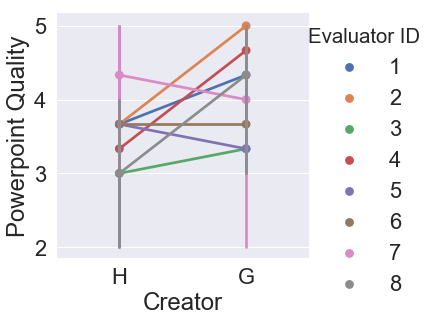

In [72]:
sns.catplot(x="Creator", y="Powerpoint Quality", 
            hue="Evaluator ID", kind="point", 
            data=df_raw);